## Importamos librerías

In [ ]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


## Descargamos los datos de imdb - Keras

In [ ]:
#obtenemos el dataset de palabras
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
#cada numero represtan una palabra
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
#represtan si tuvo una buena review o no
train_labels[1]

0

### Diccionario de palabras

In [23]:
#obtenemos el diccionario que significa cada numero en palabra
word_index = imdb.get_word_index()
#pero como el diccionario viene en formato "palabra":"numero", lo volteamos a "numero":"palabra"
word_index = dict([(value,key) for (key,value) in word_index.items()])
print(word_index.get(612))
print(word_index.get(52369))
print(word_index.get(52370))
print(word_index.get(52371))


seriously
sugercoma
grimstead
'fairy'


In [ ]:
# mostramos la descripcion del texto de la posicion 0, se lee de arriba hacia abajo
for _ in train_data[0]:
    print(word_index.get( _ - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

## Función de one-hot encoding

In [26]:
#permite convertir un cuerpo de textos a numeros para que pueda ser procesado por los modelos de machine learning
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults    

## Transformamos datos

In [28]:
#convertimos nuestro dataset de matrices en vector

x_train = vectorizar(train_data)
x_test = vectorizar(test_data)
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [29]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Creamos el modelo

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='rmsprop', #algoritmo mejorado del descenso del gradiente
              loss='binary_crossentropy',
             metrics=['acc'])

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando

In [34]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 5s 114ms/step - loss: 0.5608 - acc: 0.7382 - val_loss: 0.4570 - val_acc: 0.8134
Epoch 2/4
30/30 [==============================] - 2s 77ms/step - loss: 0.3507 - acc: 0.8953 - val_loss: 0.3342 - val_acc: 0.8817
Epoch 3/4
30/30 [==============================] - 2s 80ms/step - loss: 0.2560 - acc: 0.9227 - val_loss: 0.2996 - val_acc: 0.8878
Epoch 4/4
30/30 [==============================] - 2s 78ms/step - loss: 0.2032 - acc: 0.9373 - val_loss: 0.2975 - val_acc: 0.8802


## Analizamos resultados

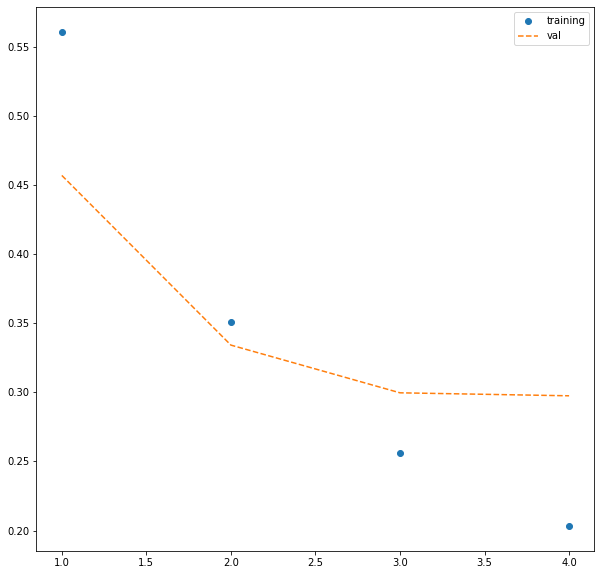

In [35]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()
#el set de validacion (linea naranja) se quedo atascado y no pudo seguir bajando
#esto quiere decir que nuestra red empezo hacer overfitting y es uno de los problemas mas grandes
#que tenemos en modelos de machine learning
#se puede jugar con la forma de la red para eliminar el overfitting

#Tecnias para eliminar overfitting:
#1. utilizar un modelo mas basico que no tenga tanta complejidad
#2. regulalizacion
#3. Tecnica drop out: permite ir apagando neuronas que casi no tienen uso, con el fin de eliminar el overfitting

In [39]:
model.evaluate(x_test, y_test)
#la precision o accuracy es de .86 es bueno el problema es que tiene muy alto el overfitting

782/782 [==============================] - 3s 4ms/step - loss: 0.3209 - acc: 0.8684


[0.32094424962997437, 0.8683599829673767]

## Predicciones

In [37]:
predictions = model.predict(x_test)

In [38]:
predictions[1]

array([0.98696995], dtype=float32)